In [61]:
import pandas as pd
# import seaborn as sns
# import numpy as np

In [62]:
df = pd.read_csv("data/sapporo_challengedata.csv")


In [63]:
df.head()

,uid,d,t,x,y
0,0,5,15,28,157
1,0,5,16,28,158
2,0,5,17,28,157
3,0,5,18,29,158
4,0,5,19,27,157


In [64]:
df.shape

(18456528, 5)

In [65]:
print(df['x'].max(),df['x'].min())
print(df['y'].max(),df['x'].min())
print(df['t'].max(),df['t'].min())

999 1
999 1
47 0


In [66]:
count_table = df.value_counts(['x', 'y']).reset_index(name='出現次數')


In [67]:
count_table
count_table.to_csv('data/sapporo_challengedata_cnt_result.csv', index=False)

In [68]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [69]:

# print(count_table)

# # 1. 模擬產生一個 count_table (如果你已經有資料，請跳過這段)
# data = []



# # for i in range(1,201):
# #     for j in range(1,2)
# heap_table = pd.DataFrame(data, 
#                            columns=[str(i) for i in range(1,201)], 
#                            index=[str(i) for i in range(1,201)])

# # 2. 設定畫布大小
# plt.figure(figsize=(10, 8))

# # 3. 繪製熱力圖
# # annot=True: 顯示格子裡的數值
# # fmt='d': 數值格式為整數 (如果是小數請用 '.2f')
# # cmap='YlGnBu': 設定顏色主題 (Yellow, Green, Blue)
# sns.heatmap(heap_table, annot=True, fmt='d', cmap='YlGnBu')

# # 4. 加入標題與顯示
# plt.title('Count Table Heatmap')
# plt.show()


# # 1. 模擬產生一個 count_table (如果你已經有資料，請跳過這段)
# data = count_table
# heap_table = pd.DataFrame(data, 
#                            columns=[str(i) for i in range(1,201)], 
#                            index=[str(i) for i in range(1,201)])

# # 2. 設定畫布大小
# plt.figure(figsize=(10, 8))

# # 3. 繪製熱力圖
# # annot=True: 顯示格子裡的數值
# # fmt='d': 數值格式為整數 (如果是小數請用 '.2f')
# # cmap='YlGnBu': 設定顏色主題 (Yellow, Green, Blue)
# sns.heatmap(heap_table, annot=True, fmt='d', cmap='YlGnBu')

# # 4. 加入標題與顯示
# plt.title('Count Table Heatmap')
# plt.show()
# # 資料收集在一起
# # detail_table = df.groupby(['x', 'y']).agg({
# # }).reset_index()

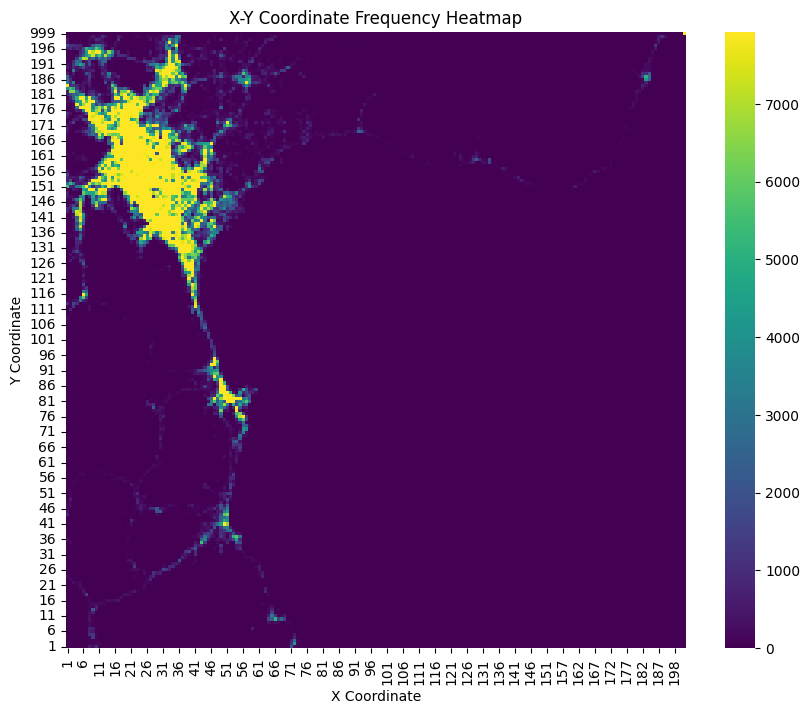

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# 1. 模擬你的資料 (假設你的 DataFrame 叫 count_table)
# data = {
#     'x': [135, 135, 134, 129, 135, 122, 44, 200, 122],
#     'y': [77, 82, 77, 81, 78, 165, 126, 168, 178],
#     '出現次數': [359963, 196083, 176167, 151722, 140375, 1, 1, 1, 1]
# }
# count_table = pd.DataFrame(data)

# --- 關鍵步驟開始 ---

# 2. 使用 pivot 轉成矩陣格式
# index='y'  -> 讓 y 軸的數值變成列索引 (Rows)
# columns='x' -> 讓 x 軸的數值變成欄位名稱 (Columns)
# values='出現次數' -> 格子裡填入的值
heat_data = count_table.pivot(index='y', columns='x', values='出現次數')

# 3. 處理空值 (原本沒有數據的座標填 0)
heat_data = heat_data.fillna(0)

# (選用) 確保座標軸是按照順序排列的 (從小到大)
heat_data = heat_data.sort_index(ascending=True).sort_index(axis=1, ascending=True)

# --- 關鍵步驟結束，現在 heat_data 已經是可以畫圖的格式了 ---

# 4. 繪圖haha
plt.figure(figsize=(10, 8))

# 繪製熱力圖
# cmap='viridis': 顏色主題
# robust=True: 如果你的數據有極端值(例如35萬 vs 1)，加上這個參數可以讓顏色分佈更均勻，不會被最大值吃掉
sns.heatmap(heat_data, cmap='viridis', robust=True) 

plt.title('X-Y Coordinate Frequency Heatmap')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# 注意：Matplotlib 預設 (0,0) 在左上角。
# 如果你的 Y 座標代表高度或地理位置 (數值越大越上面)，你可能需要反轉 Y 軸：
plt.gca().invert_yaxis()   

plt.show()


In [71]:
# def find_grid(df,n,m):
#     all_data = []
#     for i in range(1,200-n+1):
#         for j in range(1,200-m+1):
#             total = 0
#             for I in range(n):
#                 for J in range(m):
#                     total+=((df['x']==i+I)&df['y']==j+J).sum()
                    
#             all_data.append([total,i,j])
#     all_data.sort()
#     for i in all_data:
#         print(i[0],i[1],i[2])


# find_grid(data,3,3)